In [23]:
from pprint import pprint
from math import ceil
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from helpers import load_best_result, save_search_result
from loaders import load_mnist
from plotters import plot_means_w_stds, gen_and_plot_learning_curve, plot_learning_curve, gen_and_plot_validation_curve, plot_validation_curve

ImportError: cannot import name 'plot_means_w_stds'

# Load and Preprocess Data

In [3]:
df = load_mnist(preprocess=True)

1    6958
0    6824
Name: target, dtype: int64


/home/jovyan/loaders.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  filtered_df['target'] = le.fit_transform(filtered_df['target'])


### Split data into training and testing

In [4]:
X = df[[c for c in df.columns if c != 'target']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

### Skip Scaling for decision trees - it won't make a difference

# Decision Tree Model Complexity

In [5]:
from sklearn.tree import DecisionTreeClassifier

base_clf = DecisionTreeClassifier()

base_clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [6]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,17),
}

In [6]:
grid_search = GridSearchCV(
    estimator=base_clf,
    param_grid=param_grid,
    scoring='accuracy',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1,
)

In [7]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits
[CV] criterion=gini, max_depth=1 .....................................
[CV] criterion=gini, max_depth=1 .....................................
[CV] criterion=gini, max_depth=1 .....................................
[CV] criterion=gini, max_depth=1 .....................................
[CV]  criterion=gini, max_depth=1, score=0.8635420987142265, total=   0.2s
[CV] criterion=gini, max_depth=2 .....................................
[CV]  criterion=gini, max_depth=1, score=0.8652011613438407, total=   0.2s
[CV]  criterion=gini, max_depth=1, score=0.8528802320762536, total=   0.3s
[CV] criterion=gini, max_depth=2 .....................................
[CV]  criterion=gini, max_depth=1, score=0.8602819237147595, total=   0.3s
[CV] criterion=gini, max_depth=2 .....................................
[CV] criterion=gini, max_depth=2 .....................................
[CV]  criterion=gini, max_depth=2, score=0.8785743887277249, total=   

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s


[CV]  criterion=gini, max_depth=3, score=0.9079983423124741, total=   0.5s
[CV] criterion=gini, max_depth=4 .....................................
[CV]  criterion=gini, max_depth=3, score=0.9237147595356551, total=   0.5s
[CV] criterion=gini, max_depth=4 .....................................
[CV]  criterion=gini, max_depth=3, score=0.9153878058896724, total=   0.5s
[CV] criterion=gini, max_depth=4 .....................................
[CV]  criterion=gini, max_depth=3, score=0.9187059311489009, total=   0.5s
[CV] criterion=gini, max_depth=4 .....................................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s


[CV]  criterion=gini, max_depth=4, score=0.9100704517198508, total=   0.6s
[CV] criterion=gini, max_depth=5 .....................................
[CV]  criterion=gini, max_depth=4, score=0.9336650082918739, total=   0.6s
[CV] criterion=gini, max_depth=5 .....................................
[CV]  criterion=gini, max_depth=4, score=0.9265864786395687, total=   0.6s
[CV]  criterion=gini, max_depth=4, score=0.9340522604728329, total=   0.6s
[CV] criterion=gini, max_depth=5 .....................................
[CV] criterion=gini, max_depth=5 .....................................
[CV]  criterion=gini, max_depth=5, score=0.937007874015748, total=   0.8s
[CV] criterion=gini, max_depth=6 .....................................
[CV]  criterion=gini, max_depth=5, score=0.9427860696517413, total=   0.8s
[CV] criterion=gini, max_depth=6 .....................................
[CV]  criterion=gini, max_depth=5, score=0.9435918705931149, total=   0.8s
[CV] criterion=gini, max_depth=6 .................

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s


[CV]  criterion=gini, max_depth=6, score=0.9457107335267302, total=   0.9s
[CV] criterion=gini, max_depth=7 .....................................
[CV]  criterion=gini, max_depth=6, score=0.947346600331675, total=   0.9s
[CV] criterion=gini, max_depth=7 .....................................
[CV]  criterion=gini, max_depth=6, score=0.9560348403152219, total=   0.8s
[CV] criterion=gini, max_depth=7 .....................................
[CV]  criterion=gini, max_depth=6, score=0.9435918705931149, total=   0.9s
[CV] criterion=gini, max_depth=7 .....................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.8s


[CV]  criterion=gini, max_depth=7, score=0.9457107335267302, total=   1.0s
[CV] criterion=gini, max_depth=8 .....................................
[CV]  criterion=gini, max_depth=7, score=0.9535655058043118, total=   0.9s
[CV] criterion=gini, max_depth=8 .....................................
[CV]  criterion=gini, max_depth=7, score=0.947324761509747, total=   1.0s
[CV]  criterion=gini, max_depth=7, score=0.9585234342596433, total=   0.9s
[CV] criterion=gini, max_depth=8 .....................................
[CV] criterion=gini, max_depth=8 .....................................
[CV]  criterion=gini, max_depth=8, score=0.9577114427860697, total=   1.1s
[CV]  criterion=gini, max_depth=8, score=0.9461251554082055, total=   1.2s
[CV] criterion=gini, max_depth=9 .....................................
[CV] criterion=gini, max_depth=9 .....................................
[CV]  criterion=gini, max_depth=8, score=0.9477395271671506, total=   1.2s
[CV] criterion=gini, max_depth=9 .................

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.4s


[CV] criterion=gini, max_depth=10 ....................................
[CV]  criterion=gini, max_depth=10, score=0.9465395772896809, total=   2.0s
[CV] criterion=gini, max_depth=11 ....................................
[CV]  criterion=gini, max_depth=10, score=0.9589552238805971, total=   2.0s
[CV] criterion=gini, max_depth=11 ....................................
[CV]  criterion=gini, max_depth=10, score=0.9510576524263791, total=   2.0s
[CV]  criterion=gini, max_depth=10, score=0.962671090833679, total=   2.0s
[CV] criterion=gini, max_depth=11 ....................................
[CV] criterion=gini, max_depth=11 ....................................
[CV]  criterion=gini, max_depth=11, score=0.9548092868988391, total=   1.7s
[CV]  criterion=gini, max_depth=11, score=0.949026108578533, total=   1.8s
[CV] criterion=gini, max_depth=12 ....................................
[CV]  criterion=gini, max_depth=11, score=0.962671090833679, total=   1.7s
[CV] criterion=gini, max_depth=12 ...........

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.3s


[CV]  criterion=gini, max_depth=12, score=0.9643301534632932, total=   1.6s
[CV]  criterion=gini, max_depth=12, score=0.9506837961044343, total=   1.7s
[CV] criterion=gini, max_depth=13 ....................................
[CV] criterion=gini, max_depth=13 ....................................
[CV]  criterion=gini, max_depth=12, score=0.9477395271671506, total=   1.7s
[CV] criterion=gini, max_depth=13 ....................................
[CV]  criterion=gini, max_depth=12, score=0.956882255389718, total=   1.8s
[CV] criterion=gini, max_depth=13 ....................................
[CV]  criterion=gini, max_depth=13, score=0.9473684210526315, total=   1.7s
[CV] criterion=gini, max_depth=14 ....................................
[CV]  criterion=gini, max_depth=13, score=0.9593698175787728, total=   1.7s
[CV] criterion=gini, max_depth=14 ....................................
[CV]  criterion=gini, max_depth=13, score=0.9510576524263791, total=   1.7s
[CV] criterion=gini, max_depth=14 .........

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   16.8s


[CV] criterion=gini, max_depth=15 ....................................
[CV]  criterion=gini, max_depth=15, score=0.9469539991711562, total=   2.3s
[CV] criterion=gini, max_depth=16 ....................................
[CV]  criterion=gini, max_depth=15, score=0.9485690584819577, total=   2.2s
[CV]  criterion=gini, max_depth=15, score=0.9560530679933665, total=   2.3s
[CV] criterion=gini, max_depth=16 ....................................
[CV] criterion=gini, max_depth=16 ....................................
[CV]  criterion=gini, max_depth=15, score=0.9635006221484861, total=   2.3s
[CV] criterion=gini, max_depth=16 ....................................
[CV]  criterion=gini, max_depth=16, score=0.9481972648155823, total=   2.4s
[CV] criterion=entropy, max_depth=1 ..................................
[CV]  criterion=gini, max_depth=16, score=0.9614427860696517, total=   2.4s
[CV] criterion=entropy, max_depth=1 ..................................
[CV]  criterion=gini, max_depth=16, score=0.943

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.7s


[CV]  criterion=entropy, max_depth=1, score=0.8602819237147595, total=   0.3s
[CV] criterion=entropy, max_depth=2 ..................................
[CV]  criterion=entropy, max_depth=1, score=0.8577353795105765, total=   0.3s
[CV] criterion=entropy, max_depth=2 ..................................
[CV]  criterion=entropy, max_depth=1, score=0.8635420987142265, total=   0.3s
[CV] criterion=entropy, max_depth=2 ..................................
[CV]  criterion=entropy, max_depth=2, score=0.8785743887277249, total=   0.5s
[CV] criterion=entropy, max_depth=3 ..................................
[CV]  criterion=entropy, max_depth=2, score=0.8951077943615257, total=   0.5s
[CV] criterion=entropy, max_depth=3 ..................................
[CV]  criterion=entropy, max_depth=2, score=0.882206553297387, total=   0.5s
[CV] criterion=entropy, max_depth=3 ..................................
[CV]  criterion=entropy, max_depth=2, score=0.8929904603898797, total=   0.5s
[CV] criterion=entropy, max_d

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   23.9s


[CV]  criterion=entropy, max_depth=4, score=0.9286603069265865, total=   0.9s
[CV] criterion=entropy, max_depth=5 ..................................
[CV]  criterion=entropy, max_depth=4, score=0.9253421816673579, total=   0.9s
[CV] criterion=entropy, max_depth=5 ..................................
[CV]  criterion=entropy, max_depth=5, score=0.9386655615416494, total=   0.9s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=5, score=0.9361525704809287, total=   1.0s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=5, score=0.9431771049357113, total=   1.0s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=5, score=0.9448361675653256, total=   1.0s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=6, score=0.949026108578533, total=   1.1s
[CV] criterion=entropy, max_d

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   27.4s


[CV]  criterion=entropy, max_depth=7, score=0.956864371630029, total=   1.2s
[CV] criterion=entropy, max_depth=8 ..................................
[CV]  criterion=entropy, max_depth=8, score=0.950269374222959, total=   1.4s
[CV] criterion=entropy, max_depth=9 ..................................
[CV]  criterion=entropy, max_depth=8, score=0.9556384742951907, total=   1.4s
[CV] criterion=entropy, max_depth=9 ..................................
[CV]  criterion=entropy, max_depth=8, score=0.9543757776856077, total=   1.4s
[CV] criterion=entropy, max_depth=9 ..................................
[CV]  criterion=entropy, max_depth=8, score=0.9593529655744505, total=   1.5s
[CV] criterion=entropy, max_depth=9 ..................................
[CV]  criterion=entropy, max_depth=9, score=0.9498549523414836, total=   1.5s
[CV] criterion=entropy, max_depth=10 .................................
[CV]  criterion=entropy, max_depth=9, score=0.9552238805970149, total=   1.4s
[CV] criterion=entropy, max_de

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   33.0s


[CV]  criterion=entropy, max_depth=11, score=0.9523217247097844, total=   1.6s
[CV] criterion=entropy, max_depth=12 .................................
[CV]  criterion=entropy, max_depth=11, score=0.9543757776856077, total=   1.5s
[CV] criterion=entropy, max_depth=12 .................................
[CV]  criterion=entropy, max_depth=11, score=0.9655744504355039, total=   1.5s
[CV] criterion=entropy, max_depth=12 .................................
[CV]  criterion=entropy, max_depth=12, score=0.949026108578533, total=   1.6s
[CV] criterion=entropy, max_depth=13 .................................
[CV]  criterion=entropy, max_depth=12, score=0.9514925373134329, total=   1.7s
[CV] criterion=entropy, max_depth=13 .................................
[CV]  criterion=entropy, max_depth=12, score=0.9581086686022398, total=   1.5s
[CV] criterion=entropy, max_depth=13 .................................
[CV]  criterion=entropy, max_depth=12, score=0.9630858564910826, total=   1.6s
[CV] criterion=entropy

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   38.6s


[CV]  criterion=entropy, max_depth=15, score=0.9494405304600083, total=   1.6s
[CV] criterion=entropy, max_depth=16 .................................
[CV]  criterion=entropy, max_depth=15, score=0.9581086686022398, total=   1.6s
[CV] criterion=entropy, max_depth=16 .................................
[CV]  criterion=entropy, max_depth=15, score=0.9514925373134329, total=   1.7s
[CV] criterion=entropy, max_depth=16 .................................
[CV]  criterion=entropy, max_depth=15, score=0.9576939029448361, total=   1.6s
[CV] criterion=entropy, max_depth=16 .................................
[CV]  criterion=entropy, max_depth=16, score=0.9523414836303357, total=   1.5s
[CV]  criterion=entropy, max_depth=16, score=0.956864371630029, total=   1.4s
[CV]  criterion=entropy, max_depth=16, score=0.9485903814262023, total=   1.5s
[CV]  criterion=entropy, max_depth=16, score=0.9605972625466611, total=   1.3s


[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:   41.5s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 17)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=10)

In [8]:
save_search_result(grid_search, 'MNIST', 'DT')

### Analysis

In [8]:
res = load_best_result('MNIST', 'DT')
res['params']

[{'criterion': 'gini', 'max_depth': 1},
 {'criterion': 'gini', 'max_depth': 2},
 {'criterion': 'gini', 'max_depth': 3},
 {'criterion': 'gini', 'max_depth': 4},
 {'criterion': 'gini', 'max_depth': 5},
 {'criterion': 'gini', 'max_depth': 6},
 {'criterion': 'gini', 'max_depth': 7},
 {'criterion': 'gini', 'max_depth': 8},
 {'criterion': 'gini', 'max_depth': 9},
 {'criterion': 'gini', 'max_depth': 10},
 {'criterion': 'gini', 'max_depth': 11},
 {'criterion': 'gini', 'max_depth': 12},
 {'criterion': 'gini', 'max_depth': 13},
 {'criterion': 'gini', 'max_depth': 14},
 {'criterion': 'gini', 'max_depth': 15},
 {'criterion': 'gini', 'max_depth': 16},
 {'criterion': 'entropy', 'max_depth': 1},
 {'criterion': 'entropy', 'max_depth': 2},
 {'criterion': 'entropy', 'max_depth': 3},
 {'criterion': 'entropy', 'max_depth': 4},
 {'criterion': 'entropy', 'max_depth': 5},
 {'criterion': 'entropy', 'max_depth': 6},
 {'criterion': 'entropy', 'max_depth': 7},
 {'criterion': 'entropy', 'max_depth': 8},
 {'criter

In [15]:
gini_train_mean, ig_train_mean = np.split(res['mean_train_score'], 2)
gini_train_std, ig_train_std = np.split(res['std_train_score'], 2)
gini_test_mean, ig_test_mean = np.split(res['mean_test_score'], 2)
gini_test_std, ig_test_std = np.split(res['std_test_score'], 2)

In [14]:
def plot_validation_curves(train_mean1, train_std1, test_mean1, test_std1, train_mean2, train_std2, test_mean2, test_std2, param_name, param_range, ylim=[0.8, 1.03]):
    if isinstance(param_range[0], (int,float)):
        x_range = param_range
        x_labels = param_range
    else:
        x_range = range(1, len(param_range) + 1)
        x_labels = [str(p) for p in param_range]
    plt.plot(x_range, train_mean1,
             color='blue', marker='o',
             markersize=5, label='Training - Gini')
    plt.fill_between(x_range, train_mean1 + train_std1,
                     train_mean1 - train_std1, alpha=0.15,
                     color='blue')
    plt.plot(x_range, test_mean1,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='Validation - Gini')
    plt.fill_between(x_range,
                     test_mean1 + test_std1,
                     test_mean1 - test_std1,
                     alpha=0.15, color='green')
    plt.plot(x_range, train_mean2,
             color='orange', marker='o',
             markersize=5, label='Training - Entropy')
    plt.fill_between(x_range, train_mean2 + train_std2,
                     train_mean2 - train_std2, alpha=0.15,
                     color='orange')
    plt.plot(x_range, test_mean2,
             color='red', linestyle='--',
             marker='s', markersize=5,
             label='Validation - Entropy')
    plt.fill_between(x_range,
                     test_mean2 + test_std2,
                     test_mean2 - test_std2,
                     alpha=0.15, color='red')
    plt.xticks(x_range, x_labels)
    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel('Parameter %s' % param_name)
    plt.ylabel('Accuracy')
    plt.ylim(ylim)
    plt.show()

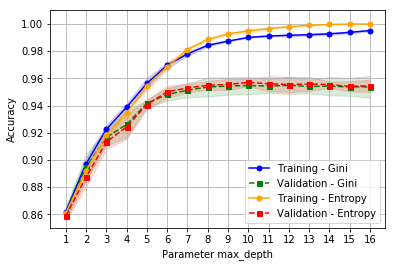

In [18]:
plot_validation_curves(gini_train_mean, gini_train_std, gini_test_mean, gini_test_std, ig_train_mean, ig_train_std, ig_test_mean, ig_test_std, 'max_depth', param_grid['max_depth'], ylim=[.85, 1.01])

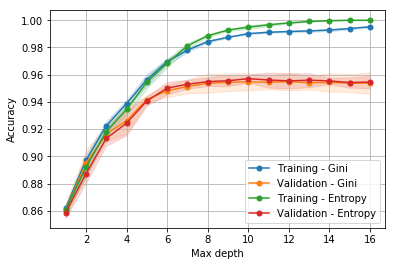

In [27]:
plot_means_w_stds(
    means=(gini_train_mean, gini_test_mean, ig_train_mean, ig_test_mean,),
    stds=(gini_train_std, gini_test_std,ig_train_std, ig_test_std),
    xrange=param_grid['max_depth'],
    series_labels=('Training - Gini', 'Validation - Gini', 'Training - Entropy', 'Validation - Entropy',),
    ylabel='Accuracy',
    xlabel='Max depth',
)

In [19]:
gini_fit_mean, ig_fit_mean = np.split(res['mean_fit_time'], 2)
gini_fit_std, ig_fit_std = np.split(res['std_fit_time'], 2)

In [24]:
def plot_means_w_stds(means, stds, xrange, series_labels=None, ylabel=None, xlabel=None, legend=True, xticks=None, ylim=None):
    """Generic plot routine to plot multiple lines on same axes"""

    for ix, mean, std, label in zip(range(len(means)), means, stds, series_labels):
        color = 'C%s' % ix
        plt.plot(xrange, mean, marker='o', markersize=5, label=label, color=color)
        plt.fill_between(xrange, mean + std, mean - std, color=color, alpha=0.15)

    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(ylim)
    if legend:
        plt.legend(loc='lower right')
    plt.show()

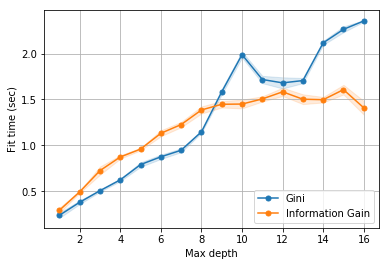

In [26]:
plot_means_w_stds(
    means=(gini_fit_mean, ig_fit_mean),
    stds=(gini_fit_std, ig_fit_std),
    xrange=param_grid['max_depth'],
    series_labels=('Gini', 'Information Gain'),
    ylabel='Fit time (sec)',
    xlabel='Max depth',
)

## Learning curve analysis

In [30]:
best_params = res['params'][np.argmax(res['mean_test_score'])]

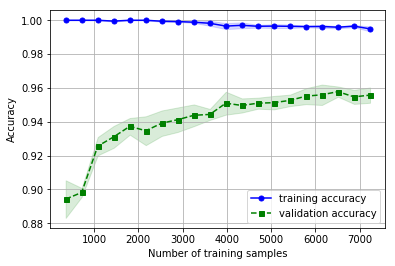

In [32]:
clf = DecisionTreeClassifier(**best_params)
train_sizes, _, _, train_mean, train_std, test_mean, test_std = gen_and_plot_learning_curve(clf, X_train, y_train, ylim=None, cv=4, train_sizes=np.linspace(.05, 1.0, 20))